# Convolutional Neural Networks: Application

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

2024-06-27 02:01:59.065677: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 02:02:00.482993: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%matplotlib inline
np.random.seed(1)
import os

In [3]:
train_dataset = h5py.File('./datasets/train_signs.h5')
test_dataset = h5py.File('./datasets/test_signs.h5')

In [4]:
X_train_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])
Y_train_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
X_test_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])
Y_test_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
classes = np.array(test_dataset["list_classes"][:])

y = 2


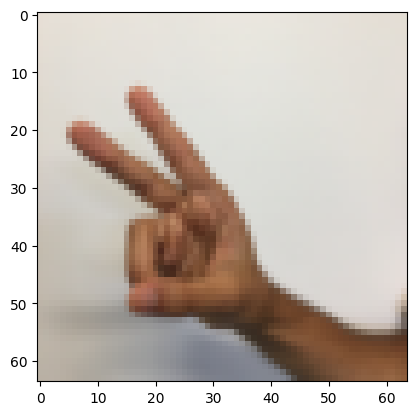

In [5]:
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [6]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [7]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.ZeroPadding2D(padding=(3, 3)),
    tf.keras.layers.Conv2D(32, (7, 7), strides=(1, 1), name='conv0'),
    tf.keras.layers.BatchNormalization(axis=-1, name='bn0'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='sigmoid', name='fc'),
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary()


2024-06-27 02:02:02.278503: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 02:02:02.337405: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 02:02:02.337995: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 70, 70, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool0 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 6)              │       196,614 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,478 (787.02 KB)

 Trainable params: 201,414 (786.77 KB)

 Non-trainable params: 64 (256.00 B)

In [9]:
history1 = model_1.fit(X_train, Y_train, epochs=20, batch_size=16)

Epoch 1/100


I0000 00:00:1719433924.308912 1469554 service.cc:145] XLA service 0x72f744008a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719433924.308956 1469554 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-06-27 02:02:04.358439: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-27 02:02:04.572457: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


34/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2821 - loss: 1.4129

I0000 00:00:1719433925.893027 1469554 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3829 - loss: 1.0611
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7711 - loss: 0.2263
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8810 - loss: 0.1413
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9667 - loss: 0.0759
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9660 - loss: 0.0580
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0430
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9935 - loss: 0.0245
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9970 - loss: 0.0172
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0094
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0067
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9999 - loss: 0.0062
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - l

In [10]:
model_1.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.9656 - loss: 0.0930


[0.1049969419836998, 0.9583333134651184]

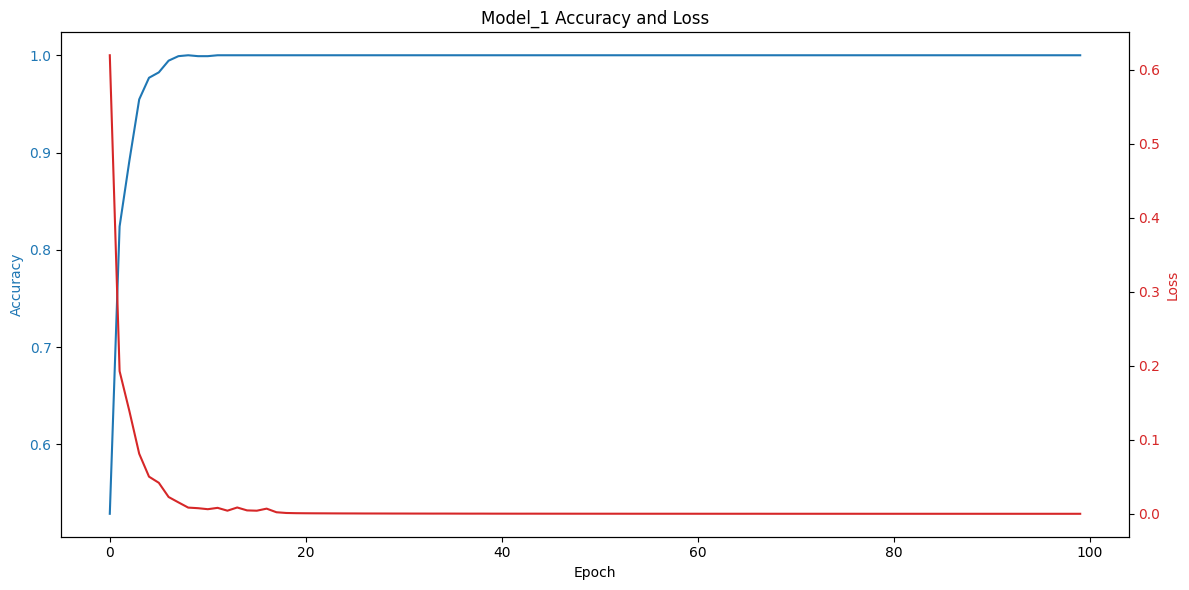

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot accuracy on the primary y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(history1.history['accuracy'], color='tab:blue', label='Train Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(history1.history['loss'], color='tab:red', label='Train Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title
plt.title('Model_1 Accuracy and Loss')

# Show the plot
fig.tight_layout()
plt.show()

In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.ZeroPadding2D(padding=(3, 3)),
    tf.keras.layers.Conv2D(64, (7, 7), strides=(1, 1), name='conv0'),
    tf.keras.layers.BatchNormalization(axis=-1, name='bn0'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='sigmoid', name='fc'),
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d_1                │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 64, 64, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool0 (MaxPooling2D)        │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 6)              │       393,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,950 (1.54 MB)

 Trainable params: 402,822 (1.54 MB)

 Non-trainable params: 128 (512.00 B)

In [13]:
history2 = model_2.fit(X_train, Y_train, epochs=40, batch_size=16)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2109 - loss: 8.5787
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4197 - loss: 1.3787
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5246 - loss: 0.7970
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5514 - loss: 0.8370
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6335 - loss: 0.3876
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6623 - loss: 0.0948
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6344 - loss: 0.2190
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6746 - loss: 0.1047
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6789 - loss: 0.2608
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7133 - loss: 0.1780
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7273 - loss: 0.3129
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

In [14]:
model_2.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.8629 - loss: 0.5113


[0.5273483991622925, 0.8500000238418579]

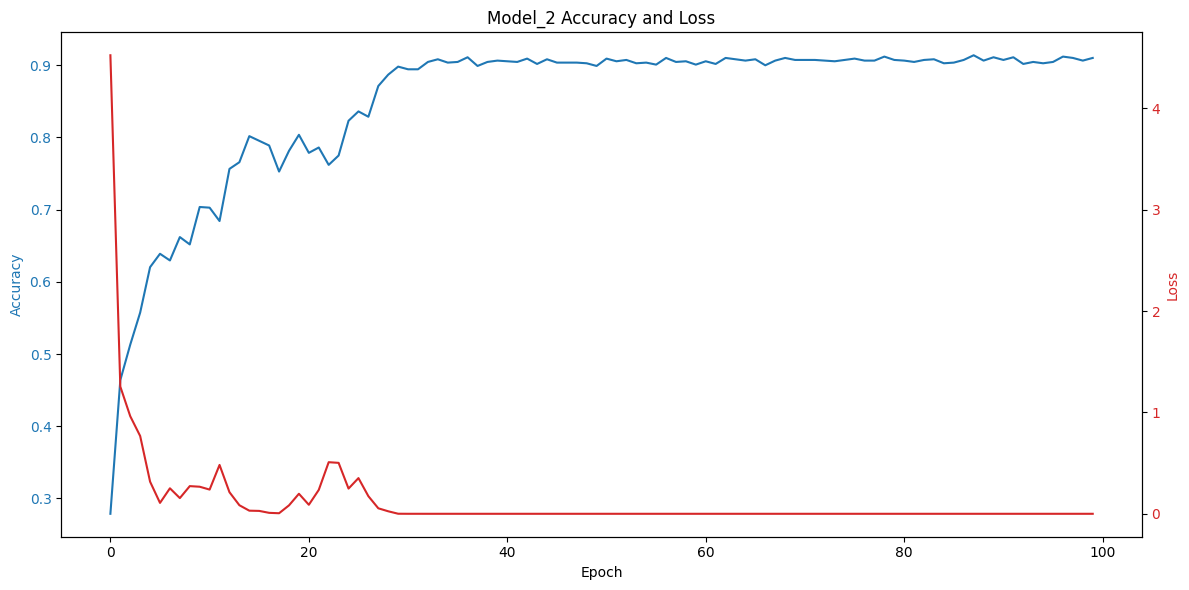

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot accuracy on the primary y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(history2.history['accuracy'], color='tab:blue', label='Train Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(history2.history['loss'], color='tab:red', label='Train Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title
plt.title('Model_2 Accuracy and Loss')

# Show the plot
fig.tight_layout()
plt.show()

In [16]:
from tensorflow.keras.preprocessing import image

In [20]:
Y_train

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0. 0. 0. 1. 0. 0.]]
Prediction: 4


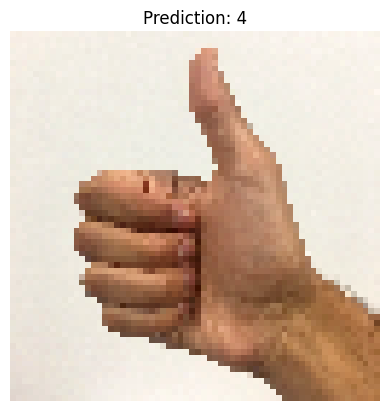

In [25]:
img_path = 'thumbs_up.jpg'  # replace with your image file path
img = image.load_img(img_path, target_size=(X_train.shape[1], X_train.shape[2]))

# Convert the image to an array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction_2 = model_2.predict(img_array)
print(prediction_2)
predicted_class_index = np.argmax(prediction_2)+1
# Output the prediction
print('Prediction:', predicted_class_index )

# Visualize the image and the prediction
plt.imshow(image.array_to_img(img_array[0]))
plt.title('Prediction: ' + str(predicted_class_index))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
[[0. 0. 0. 1. 0. 0.]]
Prediction: 4


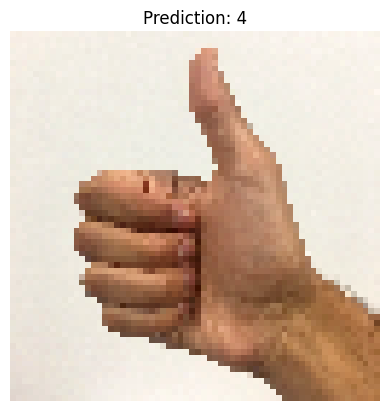

In [26]:
prediction_1 = model_1.predict(img_array)
print(prediction_1)
predicted_class_index = np.argmax(prediction_1)+1
# Output the prediction
print('Prediction:', predicted_class_index)

# Visualize the image and the prediction
plt.imshow(image.array_to_img(img_array[0]))
plt.title('Prediction: ' + str(predicted_class_index))
plt.axis('off')
plt.show()